In [1]:
pwd

'C:\\Users\\Sneha\\mywork\\tsa_cou_fol'

In [3]:
import pandas as pd
import numpy as np

In [5]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month', parse_dates=True)

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
airline['Thousands of Passengers'].isnull().any()

False

In [15]:
airline.dropna(axis=0, how='any', inplace=True)

there was no missing data but there could have been

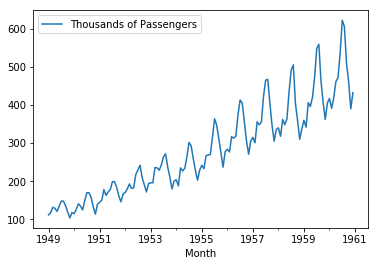

In [17]:
airline.plot();

Trend here seems to be a little non-linear, close to exponential so we'll use MULTIPLICATIVE model here.

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
result = seasonal_decompose(airline['Thousands of Passengers'] , model='multiplicative')

In [20]:
result  #a special decomposeresult object

doing tab on result will give attributes to access individual components of this result.

1. trend component :  result.trend   >>> returns a series
2. observed component : result.observed    >>> returns a series
3. seasonal component : result.seasonal   >>> returns a series
4. residual/error component : result.resid
5. to plot that entire object : result.plot();

In [22]:
result.trend.head(8)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
Name: Thousands of Passengers, dtype: float64

In [23]:
result.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Thousands of Passengers, dtype: float64

In [24]:
result.resid.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Thousands of Passengers, dtype: float64

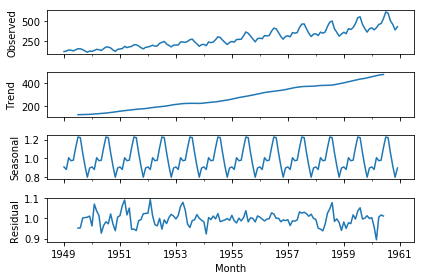

In [26]:
result.plot();

To make the above plot larger, you've a couple of methods.

In [28]:
# figsize directly in plot() wont work

result.plot(figsize=(12,5))

TypeError: plot() got an unexpected keyword argument 'figsize'

The easiest way is to <b> set your default rcParams </b>which will alter this particular notebook's default figuresize to whatever you want eg. here its 12 by 5

In [29]:
from pylab import rcParams

rcParams['figure.figsize'] = (12,5)

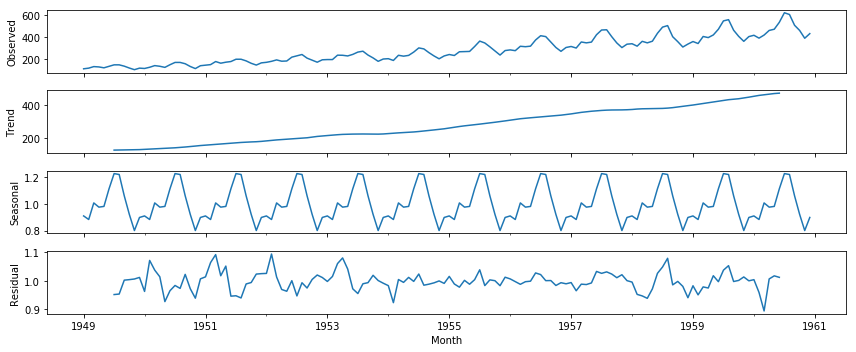

In [31]:
result.plot();

#### to plot each element indidually :

plot result.trend series

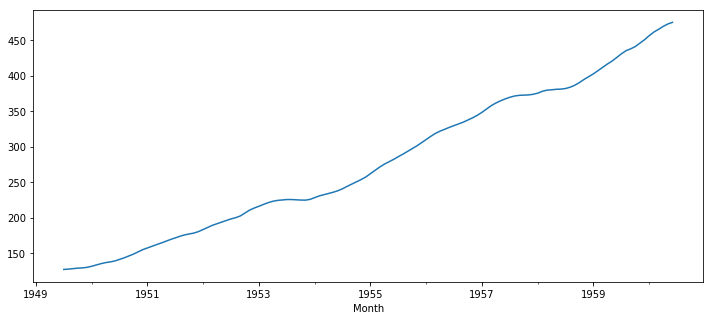

In [33]:
result.trend.plot();

Notice the graph is larger than usual. Its actually (12,5) in dimensions. why? coz you made 12 by 5 the default for this notebook. so all the graphs you print w/o explicitly specifying figsize parameter, the size is gonna be 12x5.